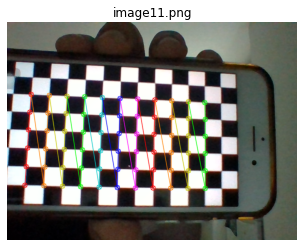

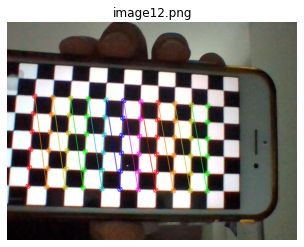

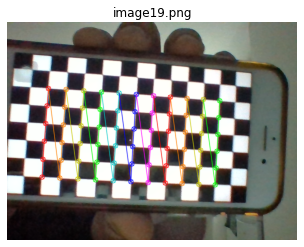

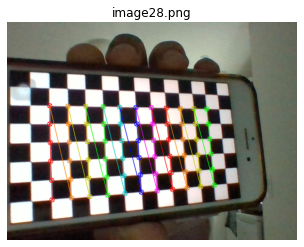

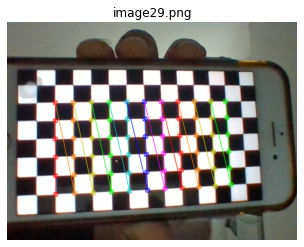

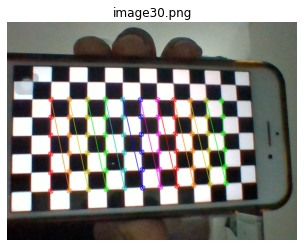

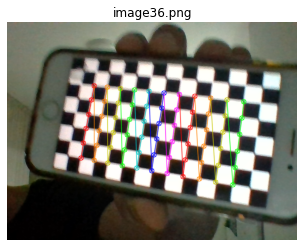

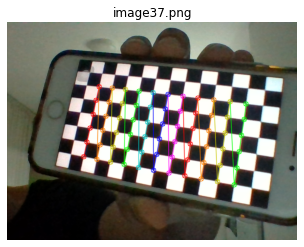

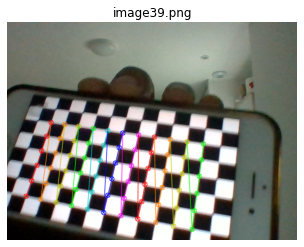

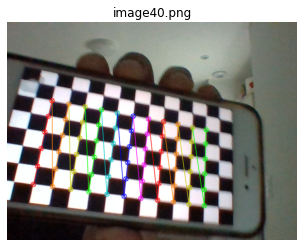

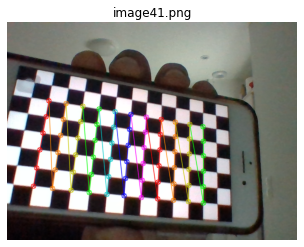

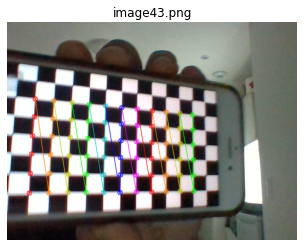

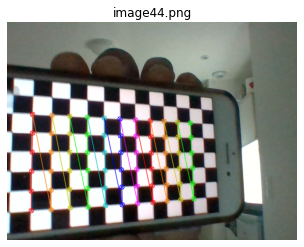

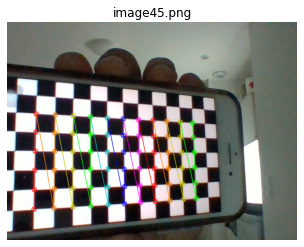

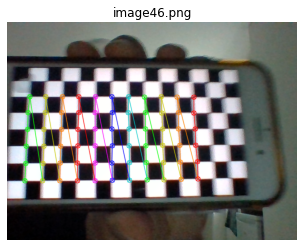

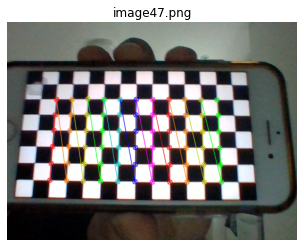

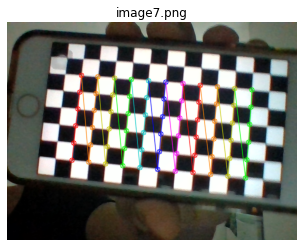

In [50]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

################ FIND CHESSBOARD CORNERS - OBJECT POINTS AND IMAGE POINTS #############################

chessboardSize = (6, 11)
frameSize = (640, 480)

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1, 2)

size_of_chessboard_squares_mm = 25
objp = objp * size_of_chessboard_squares_mm

# Arrays to store object points and image points from all the images.
objpoints = []  # 3d point in real world space
imgpoints = []  # 2d points in image plane.

images = glob.glob(r'C:\Users\HP\Desktop\images\*.png')

for image in images:
    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)

        # Get the image name (filename)
        image_name = image.split("\\")[-1]  # Extract filename from path

        # Convert BGR image to RGB for matplotlib
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Display the image with matplotlib and add the title
        plt.imshow(img_rgb)
        plt.title(image_name)  # Set the title to the image name
        plt.axis('off')  # Hide axis
        plt.show()


In [51]:
############## CALIBRATION #######################################################

ret, cameraMatrix, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, frameSize, None, None)

with open('intrinsic.npy', 'wb') as f:
    np.save(f, cameraMatrix)
print(cameraMatrix)

img = cv.imread(r'C:\Users\HP\Desktop\images\image44.png')
h,  w = img.shape[:2]
newCameraMatrix, roi = cv.getOptimalNewCameraMatrix(cameraMatrix, dist, (w,h), 1, (w,h))
print(newCameraMatrix)

with open('intrinsicNew.npy', 'wb') as f:
    np.save(f, newCameraMatrix)

# Undistort
dst = cv.undistort(img, cameraMatrix, dist, None, newCameraMatrix)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('caliResult1.png', dst)

[[657.21110191   0.         311.15996585]
 [  0.         656.56338937 232.72953692]
 [  0.           0.           1.        ]]
[[629.82037604   0.         311.47951413]
 [  0.         629.2227782  232.90872615]
 [  0.           0.           1.        ]]


True

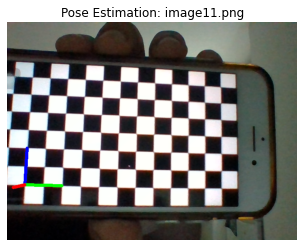

Image: image11.png
Rotation Vector (rvec): [-0.00461773 -0.19692448 -1.53711254]
Translation Vector (tvec): [-166.59835684   77.25076737  391.41136403]


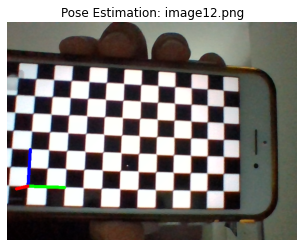

Image: image12.png
Rotation Vector (rvec): [-0.0049752  -0.20174682 -1.52768826]
Translation Vector (tvec): [-163.01287275   79.03487925  392.60161905]


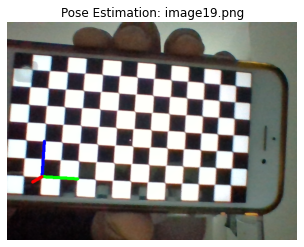

Image: image19.png
Rotation Vector (rvec): [ 0.0618538  -0.11738488 -1.50756279]
Translation Vector (tvec): [-148.68327161   68.65139009  408.08871981]


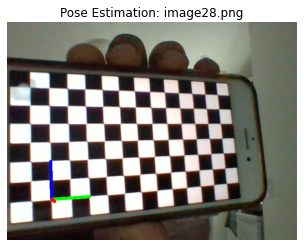

Image: image28.png
Rotation Vector (rvec): [ 0.17124061 -0.43860783 -1.58445218]
Translation Vector (tvec): [-125.35605379   93.20093384  378.27072744]


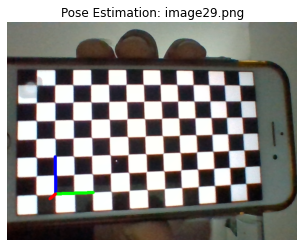

Image: image29.png
Rotation Vector (rvec): [ 0.04608485 -0.20897841 -1.59447717]
Translation Vector (tvec): [-124.31098268   89.3152772   392.903166  ]


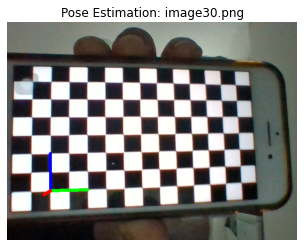

Image: image30.png
Rotation Vector (rvec): [ 0.04679207 -0.22499972 -1.58281321]
Translation Vector (tvec): [-131.01849509   84.66316812  390.98973806]


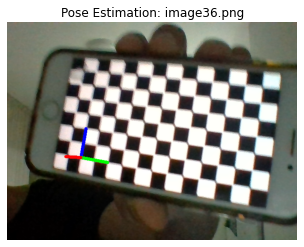

Image: image36.png
Rotation Vector (rvec): [-0.2891981   0.12874652 -1.4104813 ]
Translation Vector (tvec): [-113.79951576   50.47691156  499.67945713]


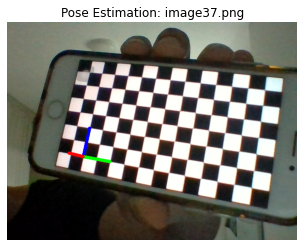

Image: image37.png
Rotation Vector (rvec): [-0.34481325  0.07127433 -1.3881153 ]
Translation Vector (tvec): [-109.94837917   48.93999446  502.5448693 ]


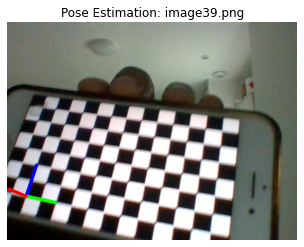

Image: image39.png
Rotation Vector (rvec): [-0.4274931  -0.20687469 -1.37630814]
Translation Vector (tvec): [-185.14882421  103.71925641  438.49499025]


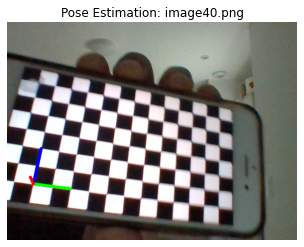

Image: image40.png
Rotation Vector (rvec): [-0.07793797 -0.47364439 -1.40989723]
Translation Vector (tvec): [-154.20525581   75.48259492  391.1541913 ]


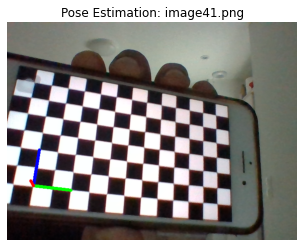

Image: image41.png
Rotation Vector (rvec): [-0.02880019 -0.4845168  -1.43486697]
Translation Vector (tvec): [-152.95776527   77.46990898  386.42224853]


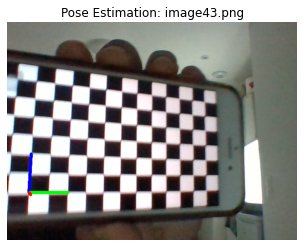

Image: image43.png
Rotation Vector (rvec): [ 0.20605327 -0.45364791 -1.50197114]
Translation Vector (tvec): [-154.26009222   83.85429173  375.17946302]


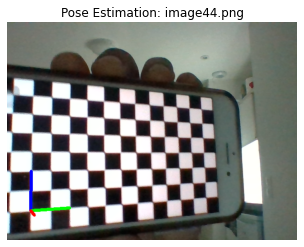

Image: image44.png
Rotation Vector (rvec): [ 0.23874897 -0.48533643 -1.5334065 ]
Translation Vector (tvec): [-149.50365083  105.40740604  367.98016433]


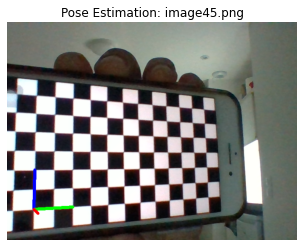

Image: image45.png
Rotation Vector (rvec): [ 0.23124531 -0.47910479 -1.53042554]
Translation Vector (tvec): [-146.35471211  104.41533256  371.02537656]


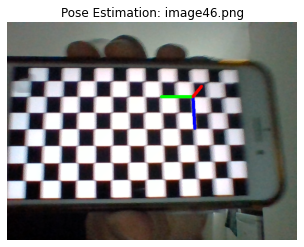

Image: image46.png
Rotation Vector (rvec): [-0.22544255  0.08975437  1.55181906]
Translation Vector (tvec): [ 70.06646874 -47.74612217 459.59407953]


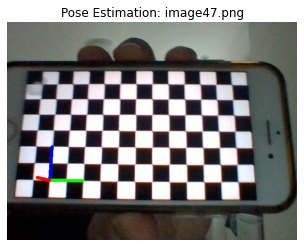

Image: image47.png
Rotation Vector (rvec): [-0.19215802 -0.18359643 -1.555819  ]
Translation Vector (tvec): [-144.08050554   76.74157434  427.22855288]


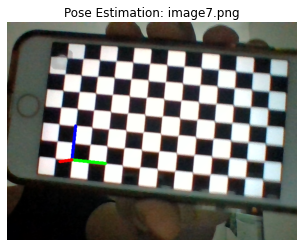

Image: image7.png
Rotation Vector (rvec): [-9.18930229e-02  3.42912744e-04 -1.47541684e+00]
Translation Vector (tvec): [-110.86926635   46.84588604  428.087656  ]


In [52]:
for image in images:
    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)

    if ret:
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        ret, rvec, tvec = cv.solvePnP(objp, corners2, cameraMatrix, dist)

        axis = np.float32([[0, 0, 0], [50, 0, 0], [0, 50, 0], [0, 0, -50]])
        imgpts, jac = cv.projectPoints(axis, rvec, tvec, cameraMatrix, dist)

        img = cv.line(img, tuple(np.int32(imgpts[0].ravel())), tuple(np.int32(imgpts[1].ravel())), (255, 0, 0), 5)  
        img = cv.line(img, tuple(np.int32(imgpts[0].ravel())), tuple(np.int32(imgpts[2].ravel())), (0, 255, 0), 5) 
        img = cv.line(img, tuple(np.int32(imgpts[0].ravel())), tuple(np.int32(imgpts[3].ravel())), (0, 0, 255), 5)

        image_name = image.split("\\")[-1]
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f"Pose Estimation: {image_name}")
        plt.axis('off')
        plt.show()

        print(f"Image: {image_name}")
        print("Rotation Vector (rvec):", rvec.ravel())
        print("Translation Vector (tvec):", tvec.ravel())